**ECE 508 Final Project - Transformer-based Object Detection (DETR)**

Remember to connect a GPU before running the code

**Step 1. Mount your Google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2.1 Set your project path**

In [2]:
%cd /content/drive/MyDrive/ECE_508/ECE508_DETR

/content/drive/MyDrive/ECE_508/ECE508_DETR


**Step 2.2 Copy your dataset from your Google Drive to the cloud-based storage**

Note: it helps accelerate fetching data when training, but all data stored on the cloud will be removed when closing the webpage

In [3]:
!cp -a '/content/drive/MyDrive/ECE_508/ECE508_DETR/data.zip' '/content'

**Step 2.3 Unzip the dataset**

command "-q" hides the printing results

In [4]:
!unzip -q /content/data.zip -d /content

**Step 3. (Optional) Check one COCO example using the DETR model**

In [ ]:
%run coco_visualize.py

**Step 4. Train DETR model using the PASCAL VOC dataset**

**(Optional)** remove outputs folder if you need

In [ ]:
# optinal
!rm -rf outputs/

Train DETR model from begining

10 epochs need ~160 mins in total

In [9]:
!python main.py \
  --dataset_file "custom" \
  --coco_path "/content/data/custom/" \
  --output_dir "outputs" \
  --resume "detr-r50_no-class-head.pth" \
  --lr 5e-5 \
  --batch_size 4\
  --num_classes 21 \
  --epochs 10 \
  --use_dn \
  --num_dn_groups 5 \
  --label_noise_ratio 0.2 \
  --box_noise_scale 0.4 \
  --dec_layers 4 \
  --num_queries 50 \
  --resize_queries \
  --amp

Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(lr=5e-05, lr_backbone=1e-05, batch_size=4, weight_decay=0.0001, epochs=10, lr_drop=5, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=4, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=50, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, use_dn=True, num_dn_groups=5, label_noise_ratio=0.2, box_noise_scale=0.4, num_classes=21, dataset_file='custom', coco_path='/content/data/custom/', coco_panoptic_path=None, remove_difficult=False, output_dir='outputs', device='cuda', seed=42, resume='detr-r50_no-class-head.pth', resize_queries=

**(Optinal)** If training is interrupted, you can resume your training from the latest epoch. Change the resume model path if different.

In [ ]:
# optinal
!python main.py \
  --dataset_file "custom" \
  --coco_path "/content/data/custom/" \
  --output_dir "outputs" \
  --resume "outputs/checkpoint.pth" \
  --lr 5e-5 \
  --batch_size 4\
  --num_classes 21 \
  --epochs 10

Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(lr=5e-05, lr_backbone=1e-05, batch_size=4, weight_decay=0.0001, epochs=10, lr_drop=5, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, use_dn=False, num_dn_groups=5, label_noise_ratio=0.2, box_noise_scale=0.4, num_classes=21, dataset_file='custom', coco_path='/content/data/custom/', coco_panoptic_path=None, remove_difficult=False, output_dir='outputs', device='cuda', seed=42, resume='outputs/checkpoint.pth', start_epoch=0, ev

**(Optinal)** evalaute mAP only

In [5]:
# optinal
!python main.py \
  --dataset_file "custom" \
  --coco_path "/content/data/custom/" \
  --output_dir "outputs" \
  --resume "outputs/checkpoint.pth" \
  --num_classes 21 \
  --eval \
  --use_dn \
  --num_dn_groups 5 \
  --label_noise_ratio 0.2 \
  --box_noise_scale 0.4 \
  --dec_layers 4 \
  --num_queries 50 \
  --resize_queries \
  --amp

Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=2, weight_decay=0.0001, epochs=300, lr_drop=5, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=4, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=50, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, use_dn=True, num_dn_groups=5, label_noise_ratio=0.2, box_noise_scale=0.4, num_classes=21, dataset_file='custom', coco_path='/content/data/custom/', coco_panoptic_path=None, remove_difficult=False, output_dir='outputs', device='cuda', seed=42, resume='outputs/checkpoint.pth', resize_queries=Tr

Count params

In [6]:
!python count_params.py \
  --checkpoint "outputs/checkpoint_DN_DETR_Dec4layers_50Queries_Amp_0.608_Params:38474714_infer:0.0582s.pth"


Loading checkpoint from: outputs/checkpoint_DN_DETR_Dec4layers_50Queries_Amp_0.608_Params:38474714_infer:0.0582s.pth
Model configuration:
  - Backbone: resnet50
  - Num queries: 50
  - Hidden dim: 256
  - Encoder layers: 6
  - Decoder layers: 4
  - DN-DETR enabled: True
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

Model Parameter Count
Total parameters:      38,474,714
Trainable parameters:  38,252,314
Non-trainable 

**5. Visualize one example based on the training model**

Inference time: 918.20 ms (0.9182 seconds)


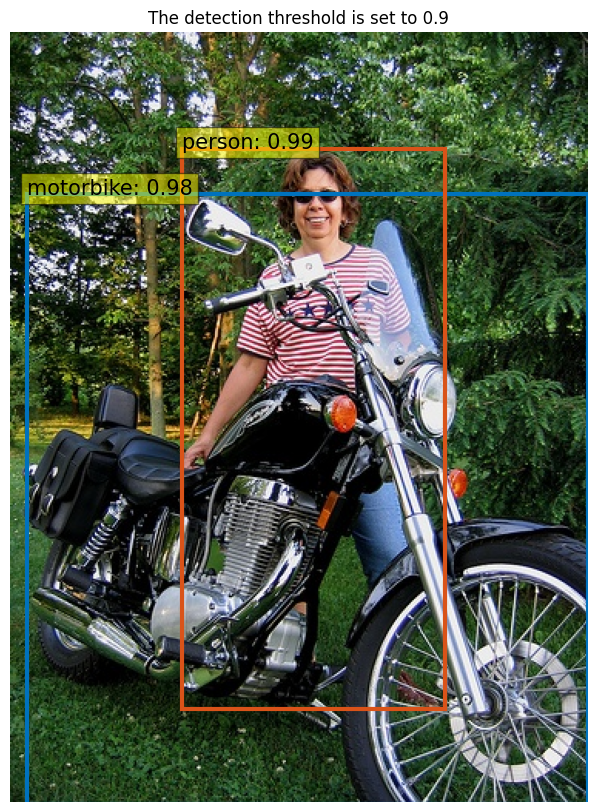

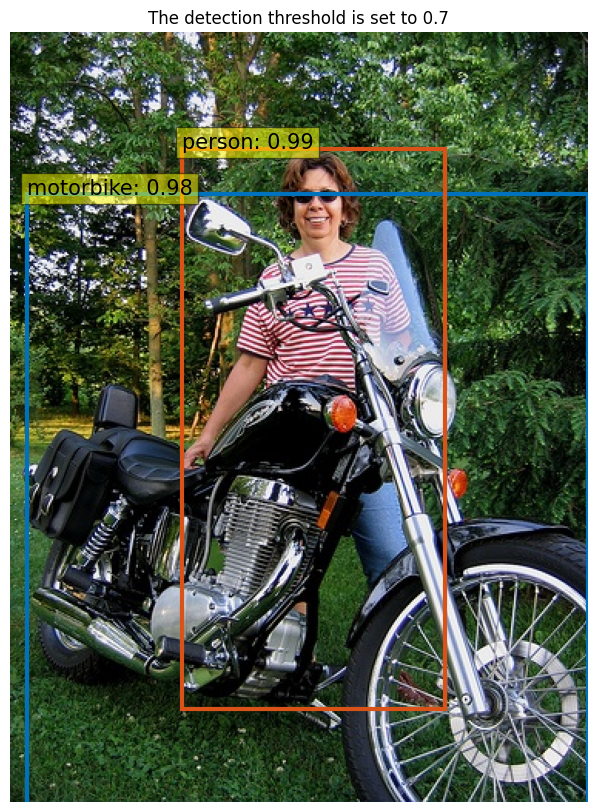

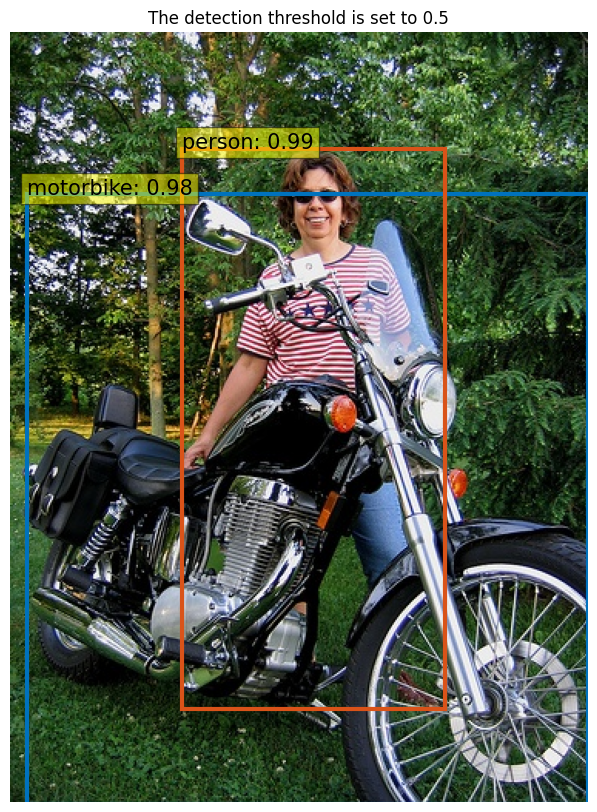

<Figure size 640x480 with 0 Axes>

In [21]:
%run eval.py